## 目次
- 輪郭抽出

https://qiita.com/icoxfog417/items/53e61496ad980c41a08e


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def to_grayscale(path):
    img = cv2.imread(path)
    grayed = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return grayed

In [3]:
def to_matplotlib_format(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
ls ../datasets/cars

0.jpg   1.jpg   2.jpg   3.jpg   4.jpeg


In [5]:
img = cv2.imread('../datasets/peach/0.jpg')
img.shape

(720, 960, 3)

In [6]:
# 画像の読込み
img_path = '../datasets/peach/0.jpg'
img = cv2.imread(img_path)

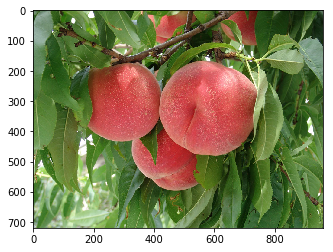

In [7]:
# 画像の表示
plt.imshow(to_matplotlib_format(img))
plt.show()

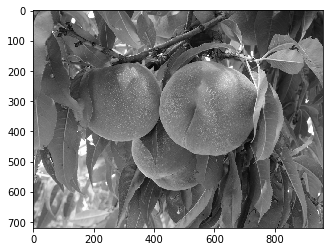

In [8]:
# グレースケールの表示
plt.imshow(to_grayscale(img_path))
plt.gray()
plt.show()


In [9]:
def binary_threshold(path):
    img = cv2.imread(path)
    grayed = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    under_thresh = 45
    upper_thresh = 219
    maxValue = 255
    th, drop_back = cv2.threshold(grayed, under_thresh, maxValue, cv2.THRESH_BINARY)
    th, clarify_born = cv2.threshold(grayed, upper_thresh, maxValue, cv2.THRESH_BINARY_INV)
    merged = np.minimum(drop_back, clarify_born)
    return merged

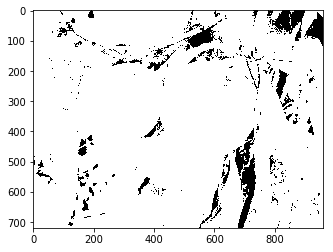

In [10]:
plt.imshow(binary_threshold(img_path))
plt.show()

In [11]:
def mask_blue(path):
    img = cv2.imread(path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    blue_max = np.array([225, 236, 182], np.uint8)
    blue_min = np.array([21, 39, 11], np.uint8)

    blue_region = cv2.inRange(hsv, blue_min, blue_max)
    white = np.full(img.shape, 255, dtype=img.dtype)
    background = cv2.bitwise_and(white, white, mask=blue_region)  # detected blue area becomes white

    inv_mask = cv2.bitwise_not(blue_region)  # make mask for not-blue area
    extracted = cv2.bitwise_and(img, img, mask=inv_mask)

    masked = cv2.add(extracted, background)

    return masked

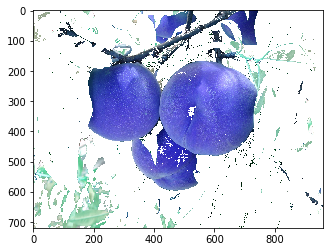

In [12]:
plt.imshow(mask_blue(img_path))
plt.show()

In [16]:
import cv2

tar = '../datasets/cat/0.jpg'
im = cv2.imread(tar)
cascade = cv2.CascadeClassifier('../cascade/cascade.xml') #分類器の指定
faces = cascade.detectMultiScale(im, 1.1, 3) #物体の検出

for (x, y, w, h) in faces:
    print(x, y, w, h)
    center = (int(x+w/2), int(y+h/2))
    radius = int(w/2+5)
    cv2.circle(im, center, radius, cv.RGB(255, 20, 147), thickness=3) #円の描画

cv2.imwrite('result.jpg', im)

SystemError: <class 'cv2.CascadeClassifier'> returned a result with an error set

In [18]:
cv2.CascadeClassifier('../cascade/cascade.xml')

SystemError: <class 'cv2.CascadeClassifier'> returned a result with an error set

In [22]:
import sys
import cv2 as cv

def detect(imagefilename, cascadefilename):
    srcimg = cv.imread(imagefilename)
    if srcimg is None:
        print('cannot load image')
        sys.exit(-1)
    dstimg = srcimg.copy()
    cascade = cv.CascadeClassifier(cascadefilename)
    if cascade.empty():
        print('cannnot load cascade file')
        sys.exit(-1)
    objects = cascade.detectMultiScale(srcimg, 1.1, 3)
    for (x, y, w, h) in objects:
        print(x, y, w, h)
        cv.rectangle(dstimg, (x, y), (x + w, y + h), (0, 0, 255), 2)
    return dstimg


result = detect('../datasets/cat/1.jpg', '../cascade/cascade.xml')
cv.imwrite('result.jpg', result)

SystemError: <class 'cv2.CascadeClassifier'> returned a result with an error set